# Portuguese Wine Quality Data

## 1. Wine Quality Dataset
This dataset, from Kaggle, is related to red variants of the Portuguese "Vinho Verde" wine. The dataset includes different chemical properties of the wine as well a quality metric. 

The main challenges to this dataset are that it is relatively small and unbalanced.

This dataset was chosen due to how clean it is, the interesting challenges it presents, and a general interest in wine.

## 2. Import Libraries and Data Health Checks

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("/home/jtotiker/Documents/DataScience/Projects/LinReg/data/WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.nunique()

fixed acidity             91
volatile acidity         135
citric acid               77
residual sugar            80
chlorides                131
free sulfur dioxide       53
total sulfur dioxide     138
density                  388
pH                        87
sulphates                 89
alcohol                   61
quality                    6
Id                      1143
dtype: int64

In [7]:
df = df.drop('Id', axis=1)

There are no null values which is good, and there are no misformatted or weird data types. The Id column is not very useful for our purposes, so we will go ahead and drop it.

## 3. Initial Exploratory Analysis

Text(0.5, 0.98, 'Data Exploration')

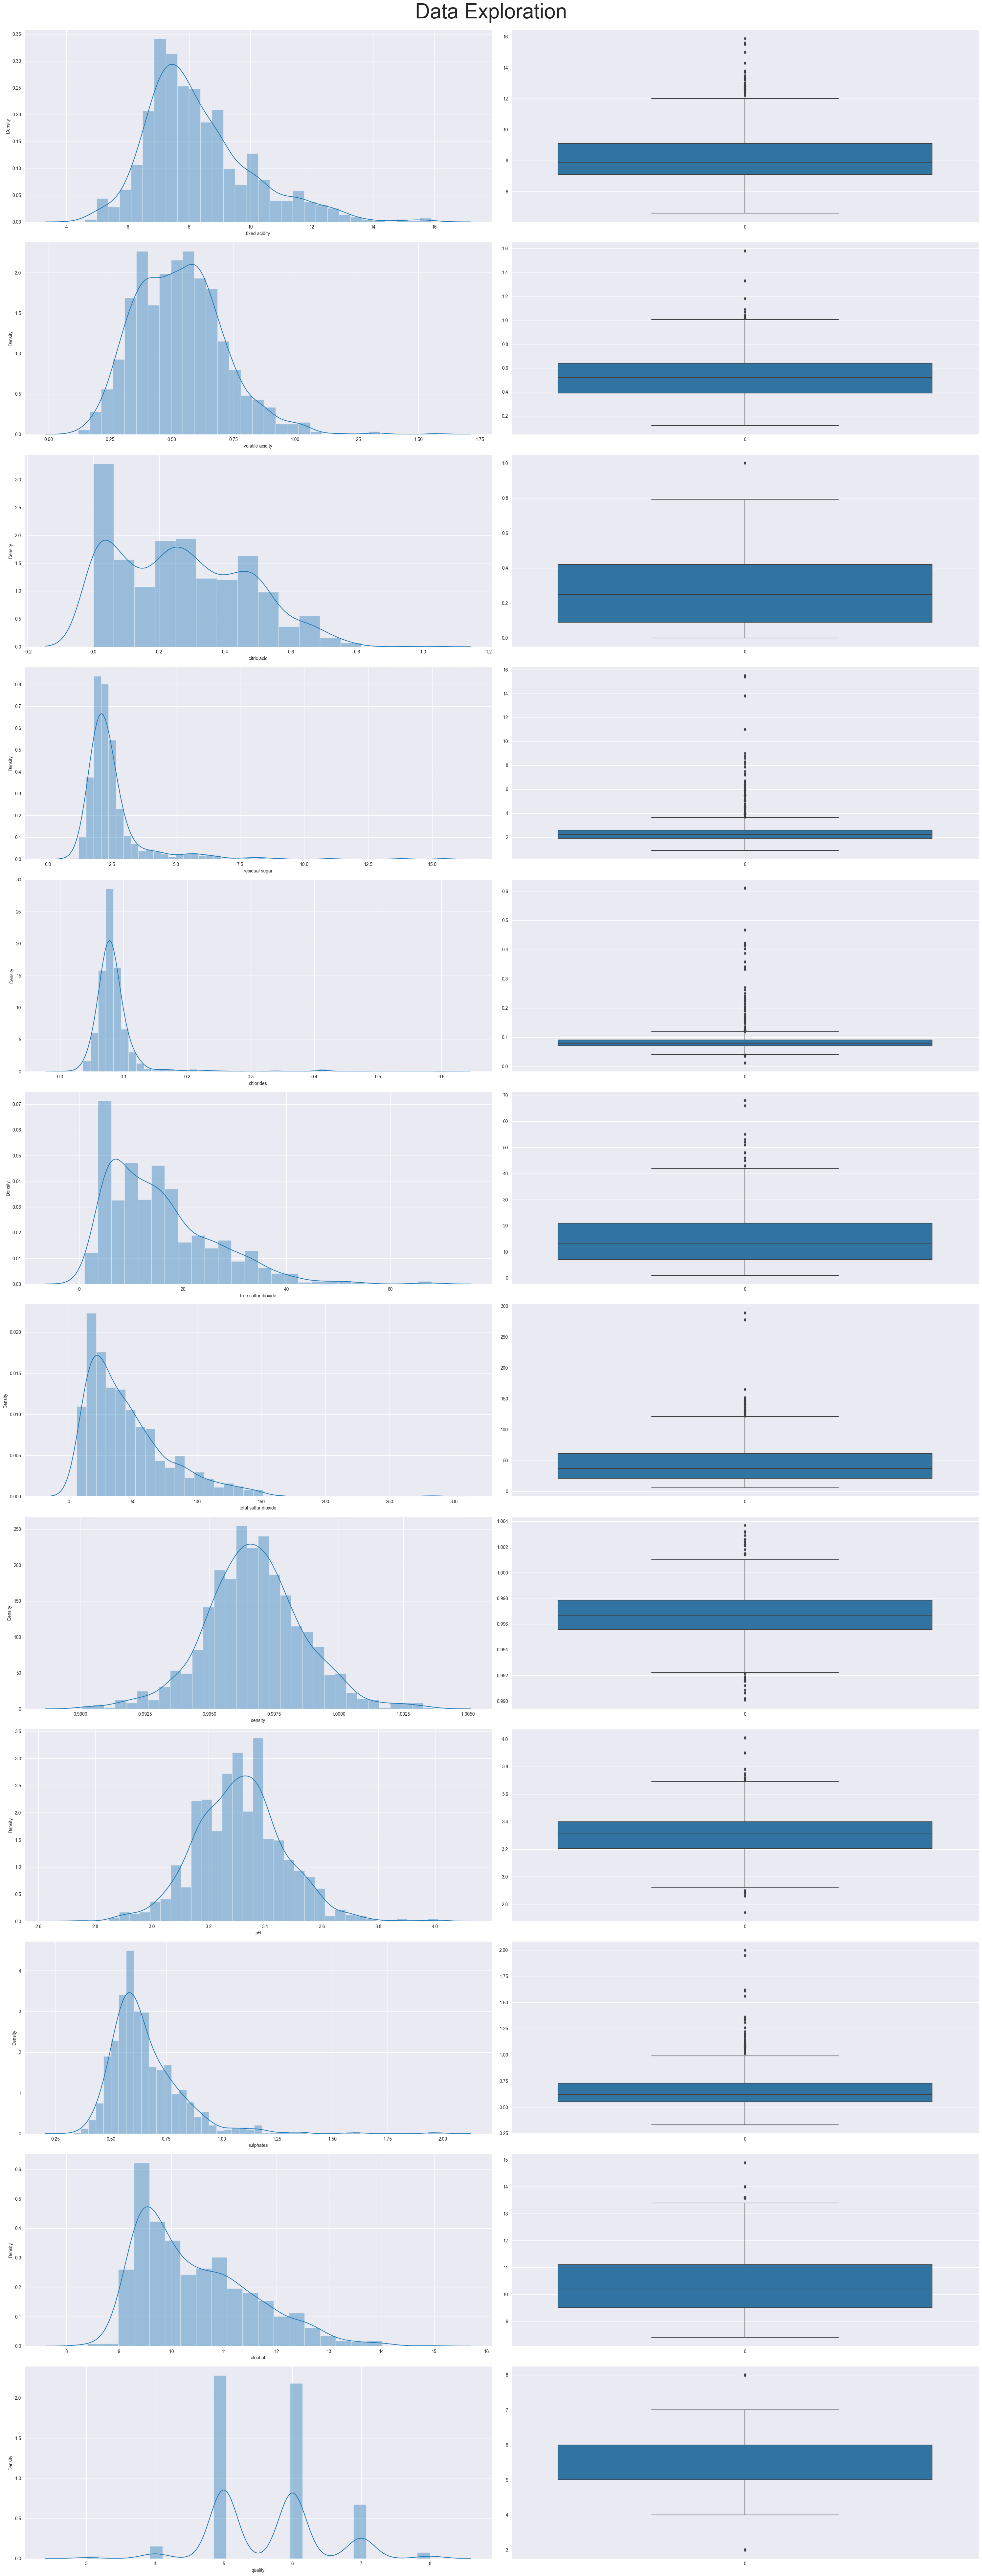

In [8]:
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(12,2,figsize=(30,80))

for index, i in enumerate(df.columns):
    sns.distplot(df[i], ax=ax[index,0])
    sns.boxplot(df[i], ax=ax[index,1])

plt.tight_layout()
plt.subplots_adjust(top=0.97)
plt.suptitle("Data Exploration", fontsize=45)

Most of the variables we have are positively skewed and do not have normal distributions with outliers. Given the smaller size of the dataset this not entirely unexpected.

The last graph shows us how unbalanced the 'quality' variable is with very few high and low quality wines. 

<AxesSubplot: xlabel='quality', ylabel='count'>

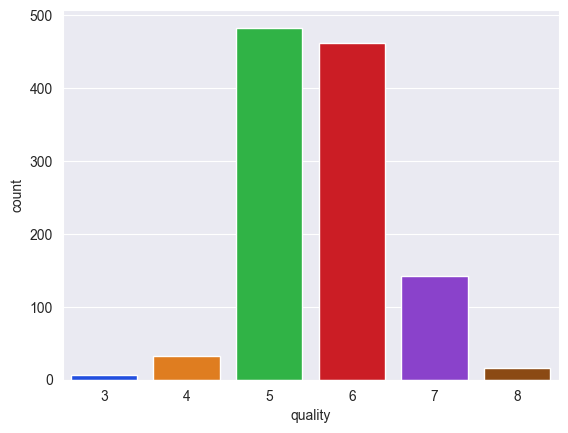

In [9]:
sns.countplot(data=df, x="quality", palette="bright")

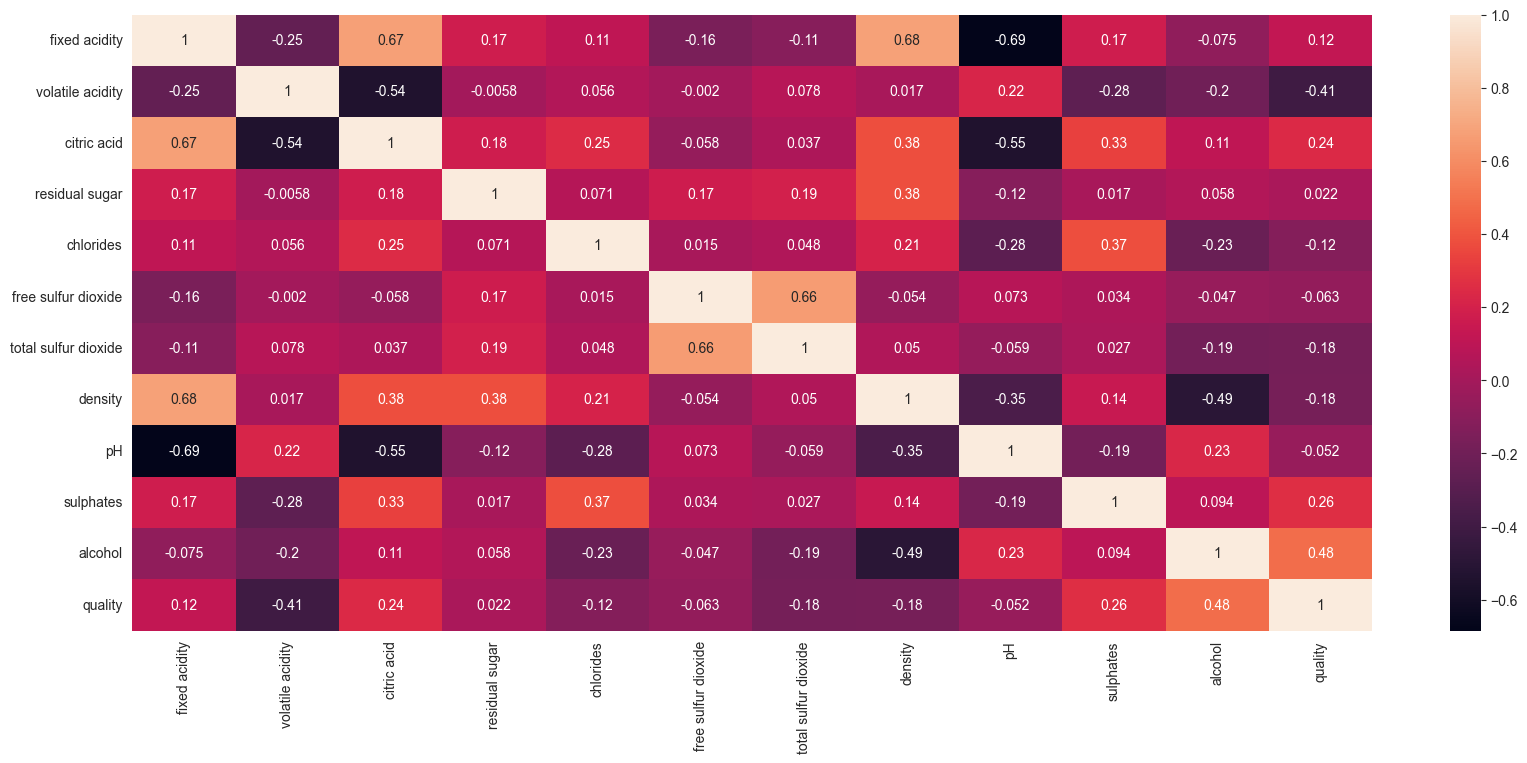

In [20]:
correlation = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation, annot=True)
plt.show()

<AxesSubplot: xlabel='quality'>

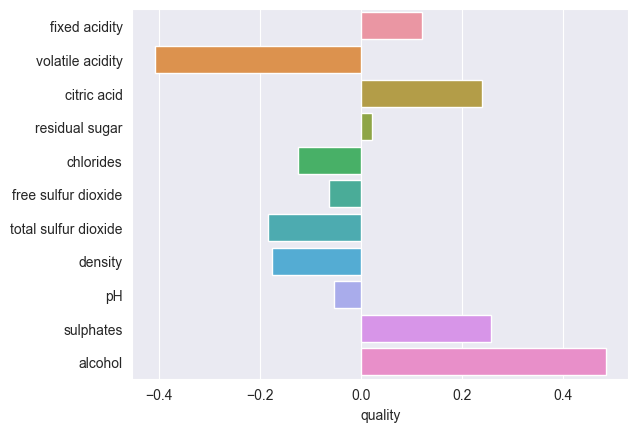

In [11]:
sns.barplot(y=correlation.columns[:11], x=correlation["quality"][:11], orient="h")

Strongest correlations are between quality and alcohol (positive) and quality and volatile acidity (negative). Also have some correlation with citric acid and sulphates. pH and residual sugar have the lowest correlation.

## 4. Data Cleaning 

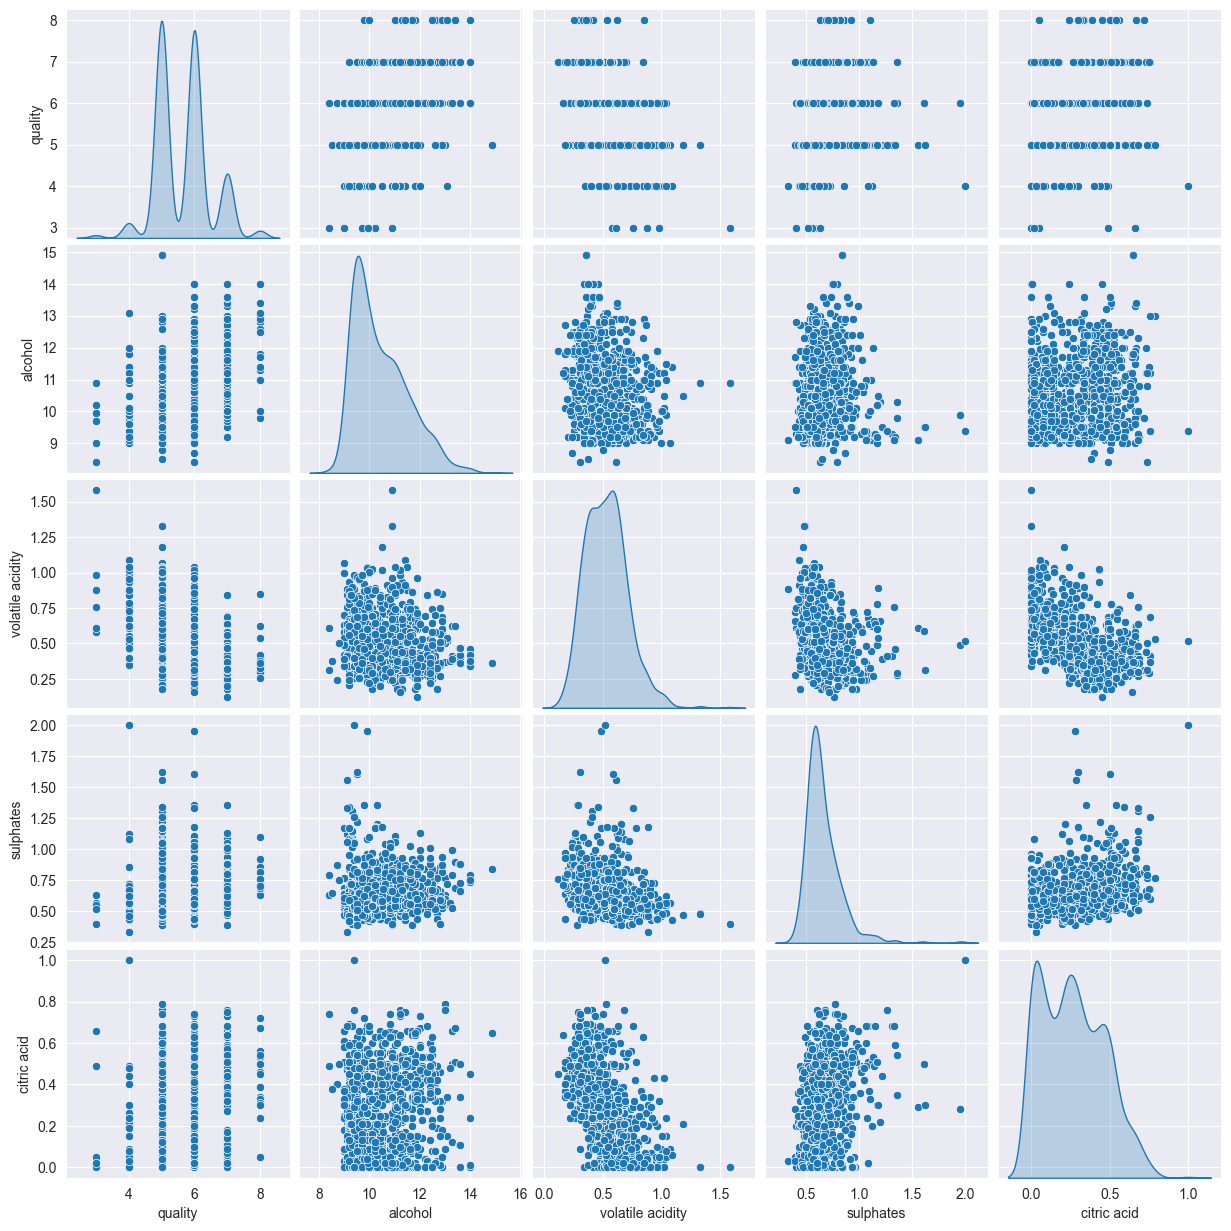

In [12]:
sns.pairplot(df[['quality','alcohol','volatile acidity','sulphates','citric acid']], kind='scatter', diag_kind='kde')

On the far right/top we can get an idea of the range of values for each factor at each quality level. For example, with alcohol we can see that while there is a wide range of values for the mid-quality wines, the quality 3 wines have the lowest range and the quality 8 wines range in the higher end. 

### 4.1 Identify Distributions

While from the eye test we can see we don't have any data that mirrors a normal distribution, to be safe we'll do a quick statistical test to confirm what we see.

In [13]:
from scipy.stats import normaltest

gauss_cols = []
non_gauss_cols = []

for col in df.columns:
    stat, p = normaltest(df[col])
    print("Statistics=%.3f, p=%.3f" % (stat, p))
    alpha = 0.05
    if p > alpha:
        gauss_cols.append(col)
    else:
        non_gauss_cols.append(col)
print(gauss_cols)

Statistics=182.746, p=0.000
Statistics=110.065, p=0.000
Statistics=87.971, p=0.000
Statistics=1068.788, p=0.000
Statistics=1341.870, p=0.000
Statistics=239.525, p=0.000
Statistics=410.950, p=0.000
Statistics=21.882, p=0.000
Statistics=30.272, p=0.000
Statistics=670.188, p=0.000
Statistics=111.567, p=0.000
Statistics=19.137, p=0.000
[]


Because we do not have any normal distributions, instead of looking at distance from the mean, using the inter-quartile range can help us identify the outliers we want to deal with.

In [14]:
def outlier_id(df, col):
    per25 = df[col].quantile(0.25)
    per75 = df[col].quantile(0.75)
    iqr = per75 - per25
    upper_limit = per75 + 1.5*iqr
    lower_limit = per25 - 1.5*iqr
    outliers = df[(df[col]>upper_limit) | (df[col] < lower_limit)]
    return outliers

cols_with_outliers = []
for col in df.columns:
    outliers = outlier_id(df, col)
    check = outliers.shape
    if check[0] > 0:
        cols_with_outliers.append(col)
print(cols_with_outliers)
cols_with_outliers.remove('quality')
print(cols_with_outliers)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


To deal with these we will winzorize the outlier values instead of cutting them, as our data set is already very sparse.

In [15]:
def winsorization(df, outlier_cols):
    winsorized_data = df.copy()
    for col in winsorized_data.columns:
        if col in cols_with_outliers:
            per25 = winsorized_data[col].quantile(0.25)
            per75 = winsorized_data[col].quantile(0.75)
            iqr = per75 - per25
            upper_limit = per75 + 1.5*iqr
            lower_limit = per25 - 1.5*iqr   
            winsorized_data.loc[winsorized_data[col] > upper_limit, col] = upper_limit
            winsorized_data.loc[winsorized_data[col] < lower_limit, col] = lower_limit
    return winsorized_data

winsorized_df = winsorization(df, cols_with_outliers)
winsorized_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 4.2 Visualize our Winsorization

To get an idea of what the winsorization does, new box plots can be made to compare the old and new distributions.

Text(0.5, 0.98, 'Box Plot Winsorized Data')

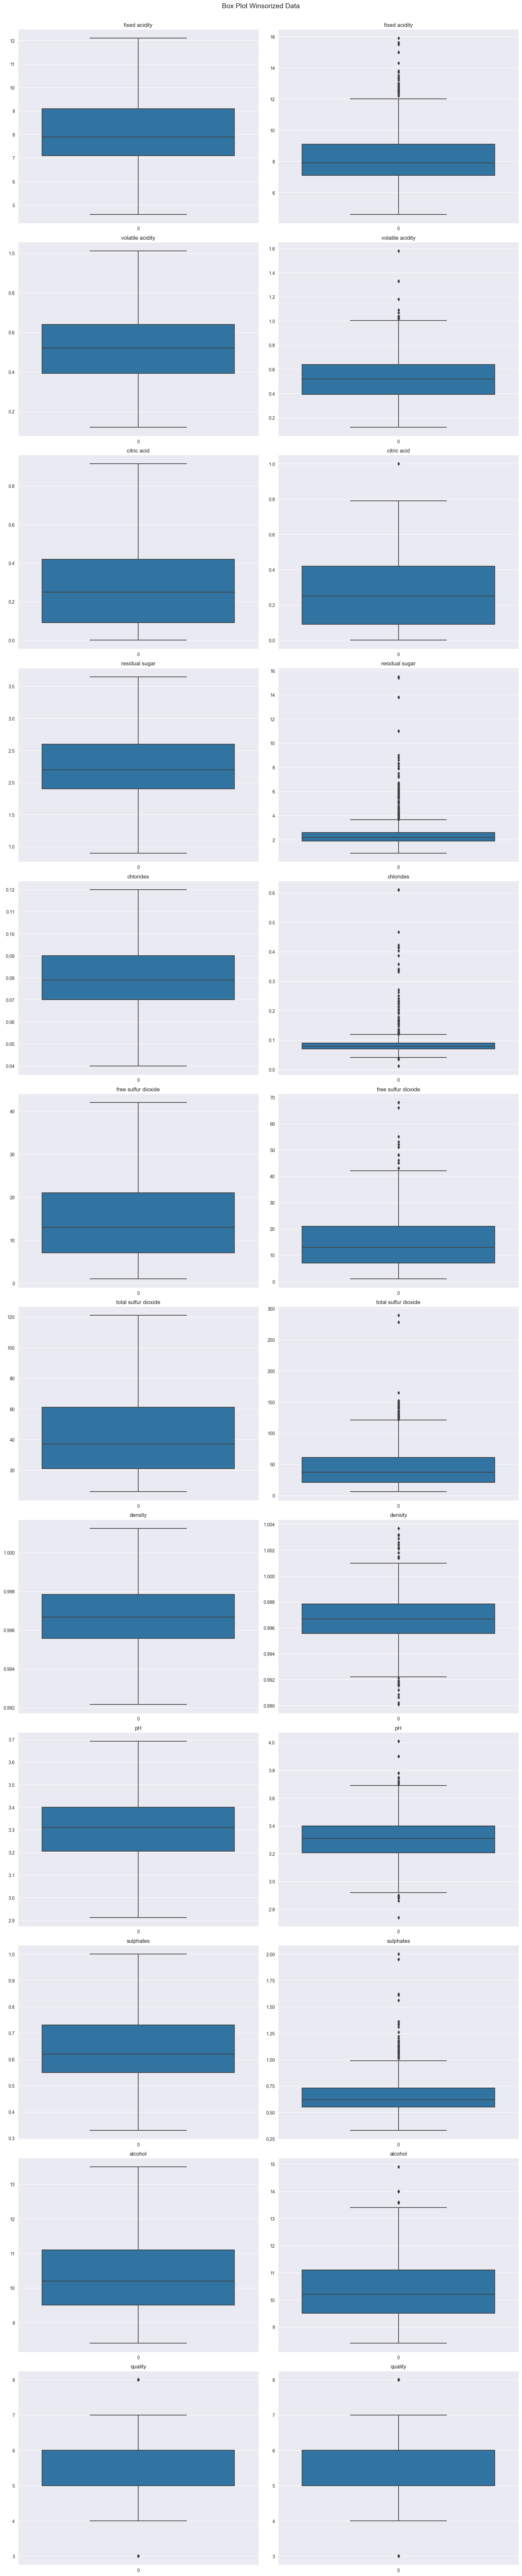

In [16]:
fig, ax = plt.subplots(len(winsorized_df.columns),2,figsize=(16,80))

for index, i in enumerate(winsorized_df.columns):
    sns.boxplot(winsorized_df[i], ax=ax[index,0])
    sns.boxplot(df[i], ax=ax[index,1])
    ax[index,0].set_title(i)
    ax[index,1].set_title(i)


plt.tight_layout()
plt.subplots_adjust(top=0.97)
plt.suptitle("Box Plot Winsorized Data", fontsize=15)

In [17]:
winsorized_df.to_csv("/home/jtotiker/Documents/DataScience/Projects/LinReg/data/winsorized_data.csv", index=False)